In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('simba sales data.csv')
df.head()

,n_distributor_id,dist_name,vno,vdt,ordertime,dispatch_time,acno,route,customer,item_count,quantity,fquantity,net_amt
0,2,Simba,1669898,2023-01-01,2023-01-01_10:36PM,2023-01-01 00:00:00_12:43AM,12641,4220,KRISHNA MEDICAL AND GENERAL STORE,2,2.0,0.0,318.02
1,2,Simba,1669899,2023-01-01,2023-01-01_10:36PM,2023-01-01 00:00:00_12:43AM,13423,233,NAWAZISH MEDICAL,1,3.0,0.0,392.62
2,2,Simba,1669900,2023-01-01,2023-01-01_10:36PM,2023-01-01 00:00:00_12:43AM,13423,233,NAWAZISH MEDICAL,1,1.0,0.0,39.13
3,2,Simba,1669901,2023-01-01,2023-01-01_10:36PM,2023-01-01 00:00:00_12:43AM,19805,4597,SHRI SAMARTH MEDICO,7,15.0,0.0,1028.58
4,2,Simba,1669902,2023-01-01,2023-01-01_10:38PM,2023-01-01 00:00:00_ 6:51AM,20034,145,LUV KUSH MEDICAL STORES,1,1.0,0.0,595.37


In [47]:
df['vdt'] = pd.to_datetime(df['vdt'])
day_level_line_items = df.groupby('vdt')['item_count'].sum()

In [39]:
# day_level_line_items[day_level_line_items['vdt']>=datetime(2023,2,15)]

<AxesSubplot:xlabel='vdt', ylabel='item_count'>

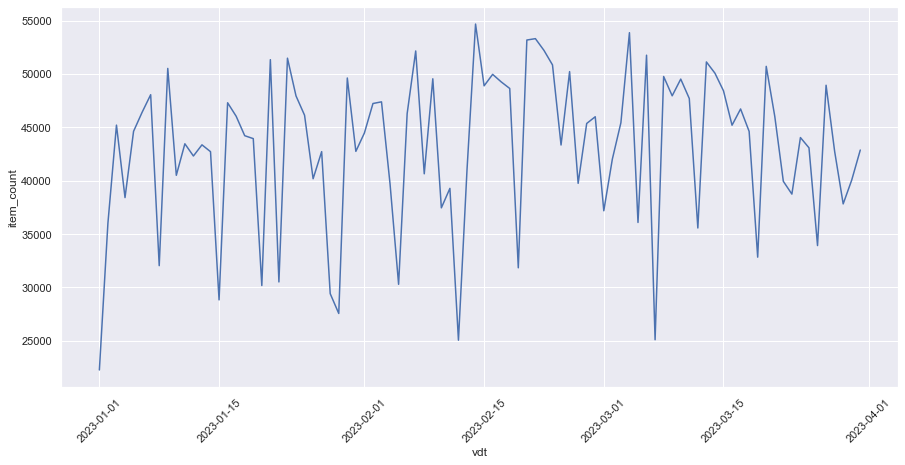

In [40]:
plt.figure(figsize=(15,7))
plt.xticks(rotation=45)
sns.set_theme(style="darkgrid")
sns.lineplot(data=day_level_line_items, x='vdt', y='item_count', estimator=np.sum)

#### Decomposition Additive

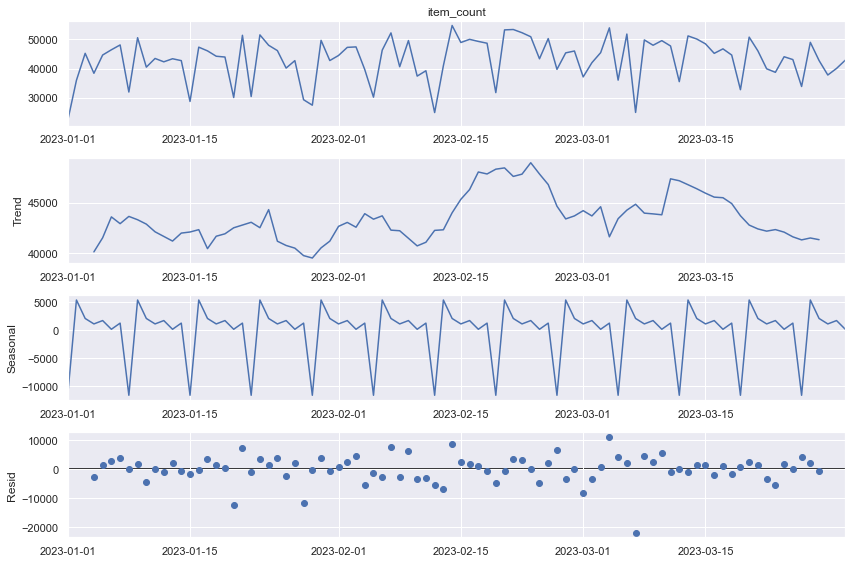

In [54]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(x=day_level_line_items, model='additive')
fig = decomposition.plot()
plt.show()

#### Decomposition Multiplicative

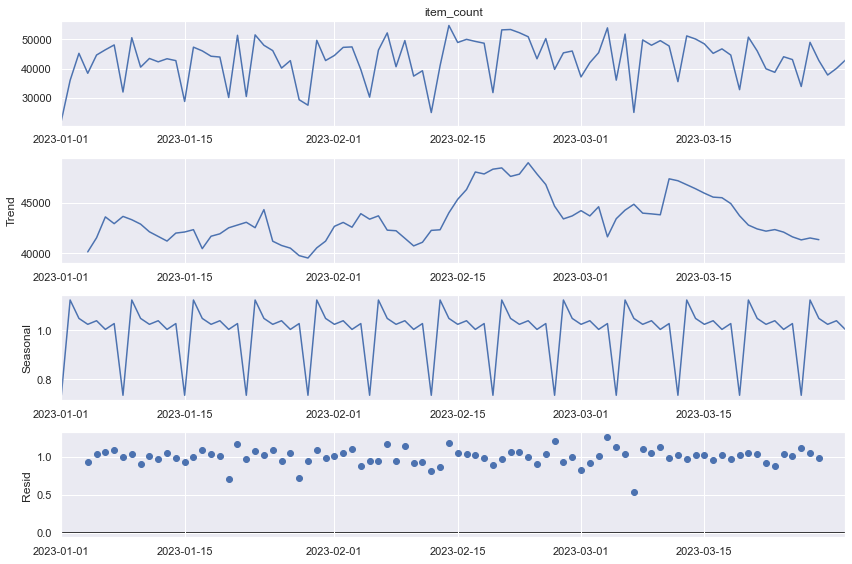

In [56]:
rcParams['figure.figsize'] = 12,8
decomposition = sm.tsa.seasonal_decompose(x=day_level_line_items, model='multiplicative')
fig = decomposition.plot()
plt.show()